<a href="https://colab.research.google.com/github/upadhyayprakash/eva4/blob/master/S8/EVA4_Session_8_CIFAR10_RESNet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Session-8 Assignment**

1. Go through this repository: https://github.com/kuangliu/pytorch-cifar (Links to an external site.)
2. Extract the ResNet18 model from this repository and add it to your API/repo. 
3. Use your data loader, model loading, train, and test code to train ResNet18 on Cifar10
4. Your Target is 85% accuracy. No limit on the number of epochs. Use default ResNet18 code (so params are fixed). 
5. Once done finish S8-Assignment-Solution. 
 

### **These are the questions in S8-A-S**

1. Share the link to your GitHub S8 code. Please make sure it is public. If your code is not modular or structured into different functional files, you will get 0 for the whole submission.
2. What is the final accuracy of your model
3. Paste your training or epoch logs here

#### **RESULT**
GitHub Source: https://github.com/upadhyayprakash/eva4/tree/master/S8

#### **Summary**

| Metric          | Values         |
| --------------- | -------------- |
| Network Arch.   | **RESNET-18**  |
| # of Epochs     | **20**         |
| # of Parameters | **11,173,962** |
| Final Accuracy  | **89.290%**    |

#### Loading the Libraries

In [0]:
# Setting up the module import directory
import sys
sys.path.append('/home/prakash/Prakash/EVA4/Session-8/Notebooks')

In [0]:
# for inline graph plotting
%matplotlib inline

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torchsummary import summary

#### Checking if GPU(CUDA) is supported

In [3]:
cuda = torch.cuda.is_available() # returns True/False
print('GPU Available?', cuda)

# initiate the Network
device = torch.device("cuda" if cuda else "cpu")

GPU Available? True


#### Loading and Transforming the CIFAR10 Dataset

In [4]:
# MODULES: Train and Test Data Loaders modules
import data_loader
trainloader = data_loader.getTrainLoader('CIFAR10')
testloader = data_loader.getTestLoader('CIFAR10')

classes = data_loader.getClasses('CIFAR10')

print('Classes: ')
print(classes)

GPU Available? True
Files already downloaded and verified
Files already downloaded and verified
Classes: 
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#### Visualize the training data

Batch Grid


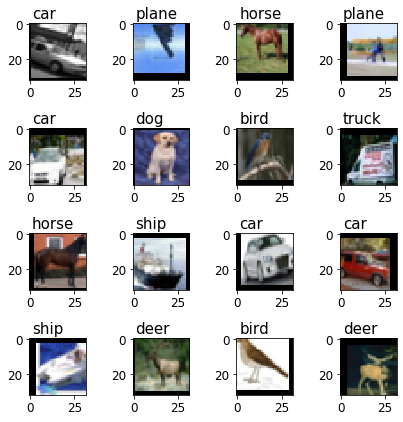

In [5]:
import visualize_data

visualize_data.visualize_batch(trainloader, classes)

### Creating the Network Object

In [6]:
# Loading the Network
# from network import Net
from resnet import ResNet18

net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32)) # Network Summary

torch.Size([1, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-1

### Training Program

In [7]:
# Model Trainer
import model_trainer
EPOCHS = 20
# Training and Testing the model
traintestresult = model_trainer.fit_model(net, EPOCHS, device, trainloader, testloader, classes)
model = traintestresult['model']

EPOCH: 1
 [================================================================>]  Step: 160ms | Tot: 1m34s | Train Loss: 1.427 | Train Acc: 48.036% (24018/50000) 391/391 
 [================================================================>]  Step: 102ms | Tot: 6s72ms | Test Loss: 1.116 | Test Acc: 60.150% (6015/10000) 79/79 
EPOCH: 2
 [================================================================>]  Step: 166ms | Tot: 1m40s | Train Loss: 0.922 | Train Acc: 67.580% (33790/50000) 391/391 
 [================================================================>]  Step: 103ms | Tot: 6s168ms | Test Loss: 0.914 | Test Acc: 69.040% (6904/10000) 79/79 
EPOCH: 3
 [================================================================>]  Step: 170ms | Tot: 1m40s | Train Loss: 0.715 | Train Acc: 75.296% (37648/50000) 391/391 
 [================================================================>]  Step: 102ms | Tot: 6s176ms | Test Loss: 0.774 | Test Acc: 73.490% (7349/10000) 79/79 
EPOCH: 4
 [==================

### Training Evaluation
Visualizing Training and Testing Results

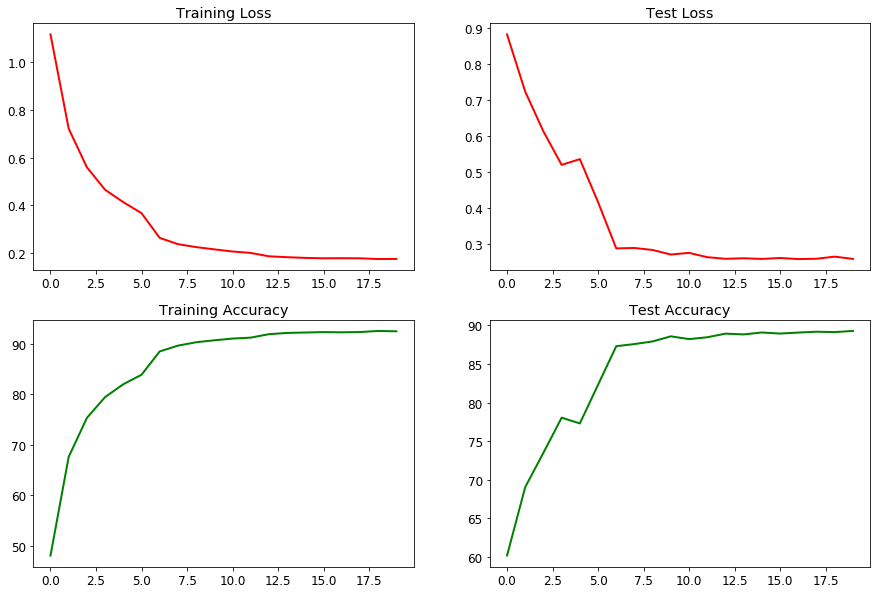

In [8]:
# extract the training/testing metrics
val_acc = traintestresult['val_acc']
val_loss = traintestresult['val_loss']
train_acc = traintestresult['train_acc']
train_loss = traintestresult['train_loss']

# visualize the training/testing stats
visualize_data.visualize_train_test_results(train_acc, train_loss, val_acc, val_loss)

### Class-wise Evaluation Result

Accuracy of plane : 96 %
Accuracy of   car : 92 %
Accuracy of  bird : 80 %
Accuracy of   cat : 83 %
Accuracy of  deer : 89 %
Accuracy of   dog : 87 %
Accuracy of  frog : 95 %
Accuracy of horse : 97 %
Accuracy of  ship : 96 %
Accuracy of truck : 92 %


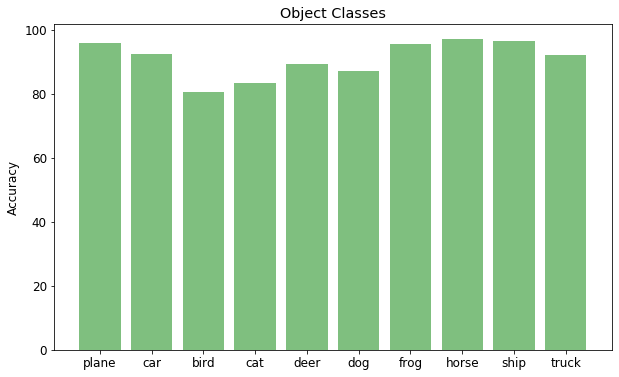

In [9]:
import class_wise_results

class_wise_results.show_class_wise_results(model, testloader, device, classes)

### Plotting Mis-classified Sample Objects

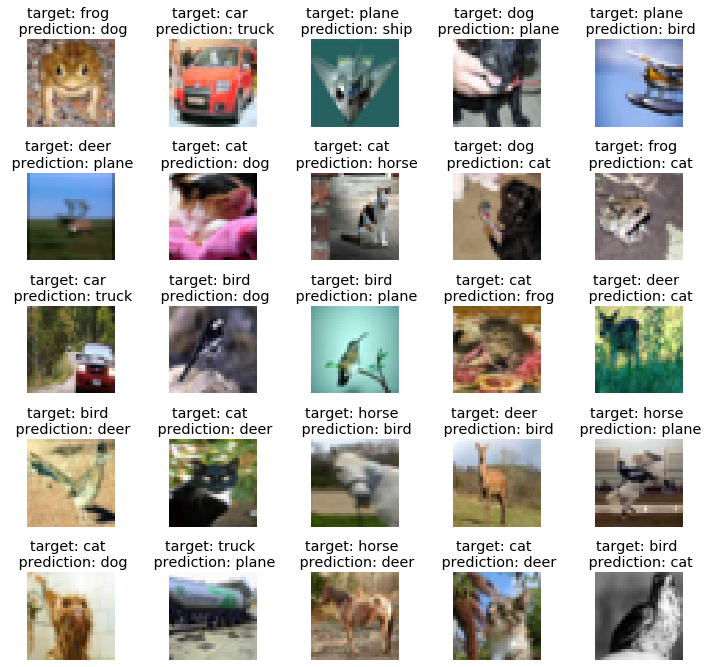

In [10]:
import misclassifieds
# Plotting mis-classified test
misclassifieds.plot_mis_classified_objects(model, device, classes, testloader)